In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-user-behavior-dataset/Spotify_data.xlsx


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("/kaggle/input/spotify-user-behavior-dataset/Spotify_data.xlsx")

In [4]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [5]:
df.shape


(520, 20)

In [6]:
df.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [8]:
df.isnull().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

In [9]:
file_path=("/kaggle/input/spotify-user-behavior-dataset/Spotify_data.xlsx")

In [10]:
df1 = pd.ExcelFile(file_path)
data = df1.parse("Sheet1")

In [11]:
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [12]:
data.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,1,0,3,4,0,1,1,1,2,2,8,25,3,3,0,0,2,0,0,1
8,1,0,2,6,0,1,2,0,2,0,4,22,5,4,3,0,3,1,2,2
16,1,0,2,6,0,1,2,0,2,0,0,22,5,1,0,0,1,1,1,2
23,1,0,3,8,1,1,2,0,6,2,6,20,14,1,3,0,2,0,2,4
24,1,1,3,7,1,1,1,0,5,2,1,11,16,3,3,7,0,0,0,1


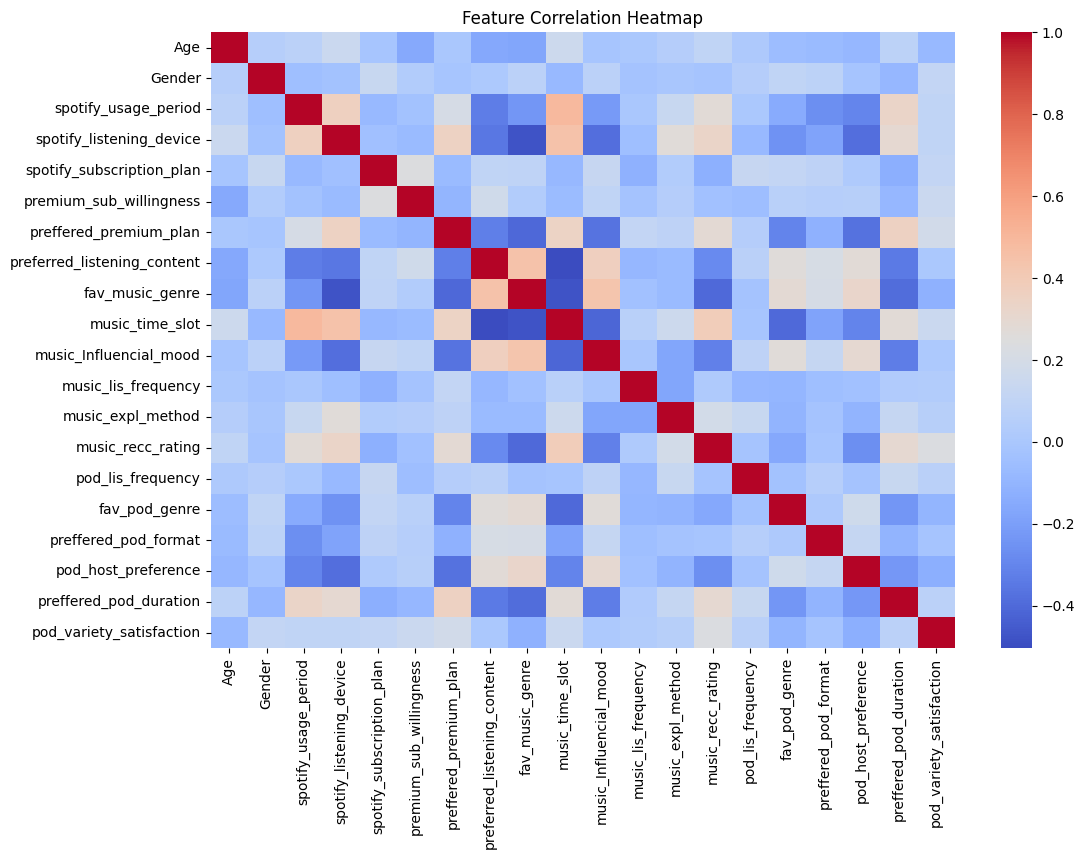

In [13]:
# Compute correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
target_variable = "spotify_subscription_plan"  # Update as necessary
y = data[target_variable]
X = data.drop(columns=[target_variable])

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top features (based on threshold)
selected_features = feature_importances[feature_importances > 0.023].index.tolist()
print(selected_features)

# Reduce dataset to selected features
X_selected = X[selected_features]


['music_lis_frequency', 'spotify_listening_device', 'premium_sub_willingness', 'music_expl_method', 'music_Influencial_mood', 'preffered_premium_plan', 'pod_variety_satisfaction', 'pod_lis_frequency', 'fav_pod_genre', 'music_recc_rating', 'pod_host_preference', 'fav_music_genre', 'spotify_usage_period', 'preffered_pod_duration', 'Age', 'preffered_pod_format', 'Gender', 'music_time_slot']


In [19]:
X_selected.head()

,music_lis_frequency,spotify_listening_device,premium_sub_willingness,music_expl_method,music_Influencial_mood,preffered_premium_plan,pod_variety_satisfaction,pod_lis_frequency,fav_pod_genre,music_recc_rating,pod_host_preference,fav_music_genre,spotify_usage_period,preffered_pod_duration,Age,preffered_pod_format,Gender,music_time_slot
0,25,4,1,3,8,1,1,0,0,3,0,2,3,0,1,2,0,2
8,22,6,1,5,4,2,2,3,0,4,1,2,2,2,1,3,0,0
16,22,6,1,5,0,2,2,0,0,1,1,2,2,1,1,1,0,0
23,20,8,1,14,6,2,4,3,0,1,0,6,3,2,1,2,0,2
24,11,7,1,16,1,1,1,3,7,3,0,5,3,0,1,0,1,2


In [20]:
# Standardizing the dataset before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [21]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [22]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train model on PCA-transformed data
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)


RandomForestClassifier(random_state=42)

In [23]:
y_pred = rf_pca.predict(X_test_pca)
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Selected Features: {selected_features}")
# print(f"F1 Score: {f1:.4f}")

Selected Features: ['music_lis_frequency', 'spotify_listening_device', 'premium_sub_willingness', 'music_expl_method', 'music_Influencial_mood', 'preffered_premium_plan', 'pod_variety_satisfaction', 'pod_lis_frequency', 'fav_pod_genre', 'music_recc_rating', 'pod_host_preference', 'fav_music_genre', 'spotify_usage_period', 'preffered_pod_duration', 'Age', 'preffered_pod_format', 'Gender', 'music_time_slot']


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [25]:
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [26]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "precision":precision_score(y_test, y_pred),
         "recall":recall_score(y_test, y_pred),
        "f1 score":f1_score(y_test, y_pred),
        "auc":roc_auc_score(y_test, y_pred),
        
        
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }



In [27]:
# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name} Results:", results[name])


Logistic Regression Results: {'Accuracy': 0.5777777777777777, 'precision': 0.3, 'recall': 0.2, 'f1 score': 0.24, 'auc': 0.4833333333333333, 'Confusion Matrix': array([[23,  7],
       [12,  3]])}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Results: {'Accuracy': 0.6666666666666666, 'precision': 0.5, 'recall': 0.2, 'f1 score': 0.28571428571428575, 'auc': 0.55, 'Confusion Matrix': array([[27,  3],
       [12,  3]])}
Gradient Boosting Results: {'Accuracy': 0.7111111111111111, 'precision': 0.5833333333333334, 'recall': 0.4666666666666667, 'f1 score': 0.5185185185185186, 'auc': 0.65, 'Confusion Matrix': array([[25,  5],
       [ 8,  7]])}


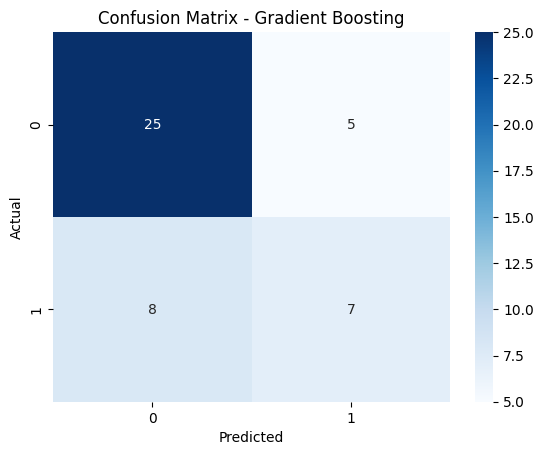

In [28]:
# Visualizing Confusion Matrix for Best Model
best_model_name = max(results, key=lambda x: results[x]['f1 score'])
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

In [29]:
# Drop rows with missing values (optional, depending on tolerance)
df = df.dropna()

# Encode all categorical columns
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head()


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,1,0,3,4,0,1,1,1,2,2,8,25,3,3,0,0,2,0,0,1
8,1,0,2,6,0,1,2,0,2,0,4,22,5,4,3,0,3,1,2,2
16,1,0,2,6,0,1,2,0,2,0,0,22,5,1,0,0,1,1,1,2
23,1,0,3,8,1,1,2,0,6,2,6,20,14,1,3,0,2,0,2,4
24,1,1,3,7,1,1,1,0,5,2,1,11,16,3,3,7,0,0,0,1


In [30]:
# Define churn: Not willing to pay = churned
df['churn'] = df['premium_sub_willingness'].apply(lambda x: 1 if x == 0 else 0)

df['churn'].value_counts()

# Define churn: Not willing to pay = churned
df['churn'] = df['premium_sub_willingness'].apply(lambda x: 1 if x == 0 else 0)

df['churn'].value_counts()


churn
0    143
1     81
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


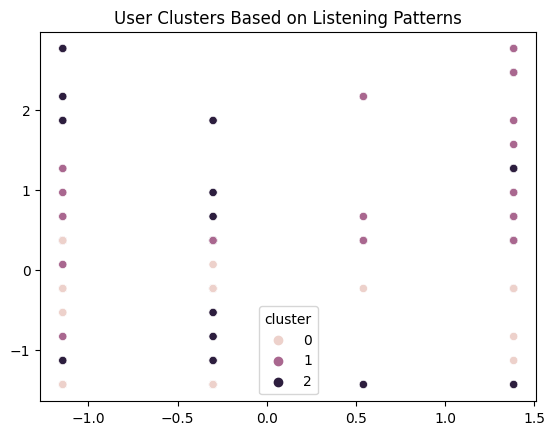

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

features = ['spotify_usage_period', 'spotify_listening_device', 'music_lis_frequency',
            'fav_music_genre', 'pod_lis_frequency', 'music_time_slot']

scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled)

# Plot clusters
sns.scatterplot(x=scaled[:, 0], y=scaled[:, 1], hue=df['cluster'])
plt.title("User Clusters Based on Listening Patterns")
plt.show()


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features for prediction
predictor_features = ['spotify_usage_period', 'spotify_listening_device', 'music_lis_frequency',
                      'fav_music_genre', 'pod_lis_frequency', 'music_time_slot', 'cluster']

X = df[predictor_features]
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[24  6]
 [11  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        30
           1       0.40      0.27      0.32        15

    accuracy                           0.62        45
   macro avg       0.54      0.53      0.53        45
weighted avg       0.59      0.62      0.60        45



In [33]:
# Assign price per cluster
def price_plan(cluster):
    if cluster == 0:
        return 179
    elif cluster == 1:
        return 119
    else:
        return 59

df['price'] = df['cluster'].apply(price_plan)

# Revenue from retained (non-churned) users
retained = df[df['churn'] == 0]
monthly_revenue = retained['price'].sum()

print(f"Simulated Monthly Revenue from Retained Users: ₹{monthly_revenue}")


Simulated Monthly Revenue from Retained Users: ₹19357
